In [1]:
import os
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
#from google.colab import drive
#drive.mount('/content/drive')

In [35]:
# Define the path to your dataset
data_dir ="C:/Users/Nithin R/Downloads/Dataset-2/train"
print(data_dir)

C:/Users/Nithin R/Downloads/Dataset-2/train


In [3]:
# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [30]:
batch_size = 32
target_size = (128, 128)  # Reduce the image size
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir),
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  # aUse 'categorical' for multi-class classification
    shuffle=True
)

# Load a pre-trained MobileNetV2 model without the top (fully connected) layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add your custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)  # Match the number of classes in your dataset
model = Model(inputs=base_model.input, outputs=predictions)
print(x)


Found 3833 images belonging to 5 classes.
KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='dense_16/Relu:0', description="created by layer 'dense_16'")


Found 3833 images belonging to 5 classes.


Epoch 1/25
120/120 [==============================] - 262s 2s/step - loss: 0.8812 - accuracy: 0.6739
Epoch 2/25
120/120 [==============================] - 248s 2s/step - loss: 0.6950 - accuracy: 0.7501
Epoch 3/25
120/120 [==============================] - 247s 2s/step - loss: 0.6549 - accuracy: 0.7618
Epoch 4/25
120/120 [==============================] - 246s 2s/step - loss: 0.6250 - accuracy: 0.7743
Epoch 5/25
120/120 [==============================] - 253s 2s/step - loss: 0.5817 - accuracy: 0.7855
Epoch 6/25
120/120 [==============================] - 252s 2s/step - loss: 0.5458 - accuracy: 0.8035
Epoch 7/25
120/120 [==============================] - 250s 2s/step - loss: 0.5159 - accuracy: 0.8035
Epoch 8/25
120/120 [==============================] - 247s 2s/step - loss: 0.5097 - accuracy: 0.8124
Epoch 9/25
120/120 [==============================] - 244s 2s/step - loss: 0.5006 - accuracy: 0.8255
Epoch 10/25
120/120 [==============================] - 246s 2s/step - loss: 0.4876 - accura

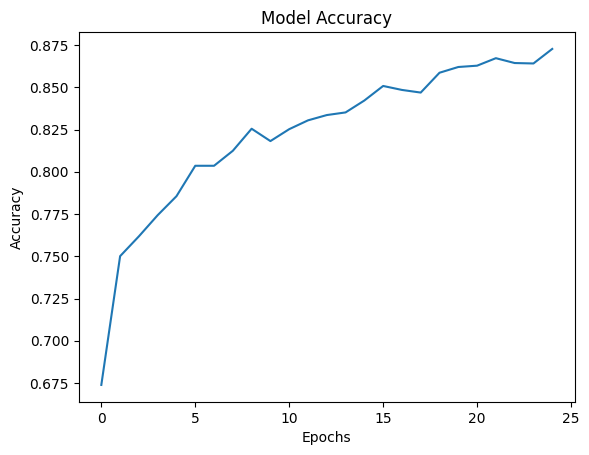

Total runtime: 6021.74 seconds


In [11]:
# Create a data generator for training data
batch_size = 32
target_size = (128, 128)  # Reduce the image size
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir),
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  # aUse 'categorical' for multi-class classification
    shuffle=True
)

# Load a pre-trained MobileNetV2 model without the top (fully connected) layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add your custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)  # Match the number of classes in your dataset

# Create a new model by combining the base model and custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),  # You can adjust the learning rate as needed
              loss='categorical_crossentropy',  # Use the appropriate loss function
              metrics=['accuracy'])  # You can add more metrics if needed

# Record start time
start_time = time.time()

# Train the model and record history
history = model.fit(
    train_generator,
    epochs=25
)

# Record end time
end_time = time.time()

# Plot the accuracy graph
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Calculate and print the runtime
runtime = end_time - start_time
print(f"Total runtime: {runtime:.2f} seconds")


In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define a function to make predictions
def predict_DR_type(image_path):
    # Load the image from the specified path
    img = image.load_img(image_path, target_size=(128, 128))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image data

    # Make predictions
    predictions = model.predict(img)
    print(predictions)

    # Map class indices to class labels (assuming class indices 0, 1, 2, 3 correspond to tumor types)
    class_labels = ["Mild","Moderate","No_DR", "Proliferate_DR","Sever"]

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    print(predicted_class_index)
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

# Example usage
image_path = "C:/Users/Nithin R/Downloads/Dataset-2/train/Severe/fcc6aa6755e6.png"  # Replace with the path to your image
predicted_DR_type = predict_DR_type(image_path)
print(f"Predicted DR Type: {predicted_DR_type}")


1/1 [==============================] - 0s 65ms/step
[[0.19879931 0.19531645 0.14331134 0.26303148 0.19954151]]
3
Predicted DR Type: Proliferate_DR


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Generate a classification report
y_true = []  # Ground truth labels
y_pred = []  # Predicted labels

for _ in range(len(train_generator)):
    images, labels = train_generator.next()
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(model.predict(images), axis=1))

class_names = list(train_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names, zero_division=1)

print(report)

1/1 [==============================] - 0s 433ms/step


KeyboardInterrupt: 

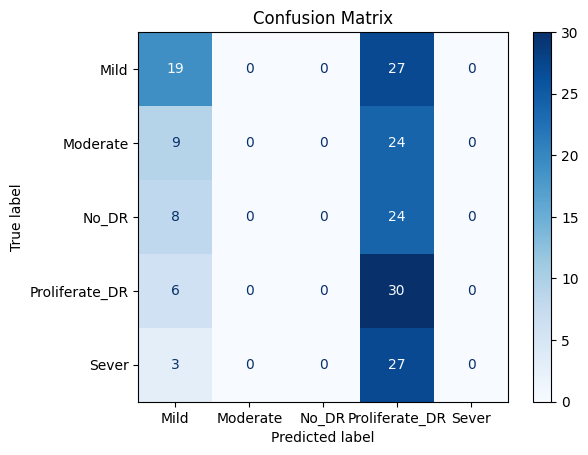

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

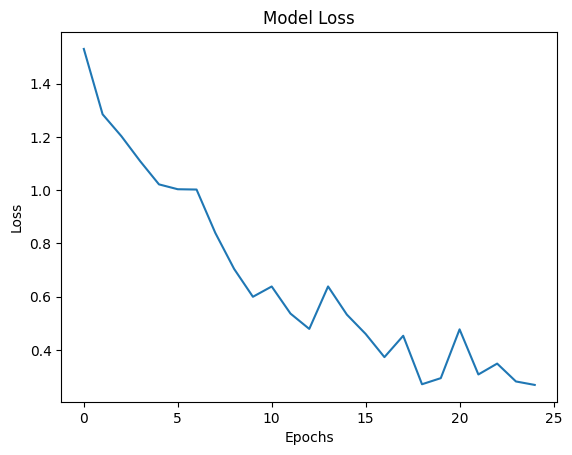

In [ ]:


# Plot the loss graph
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
